In [67]:
%load_ext autoreload
%autoreload 2
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import LogNorm
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
import cartopy

from satpy import Scene
from glob import glob
from pansat.products.satellite.gpm import l2b_gpm_cmb
from pansat.products.satellite.goes import goes_16_l1b_radiances_rgb_full_disk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
t_0 = datetime(2017,12,30,18,17,34)
t_1 = datetime(2017,12,30,19,50,9)

In [33]:
files = l2b_gpm_cmb.download(t_0, t_1, '../dataset/temp/')

In [34]:
dataset = l2b_gpm_cmb.open(files[0])
lats = dataset["latitude"]
lons = dataset["longitude"]
precip = dataset["surface_precipitation"]

In [51]:
dataset

<xarray.Dataset>
Dimensions:                (matched_pixels: 49, matched_scans: 7937, scans: 7937)
Coordinates:
  * matched_scans          (matched_scans) int64 0 1 2 3 ... 7933 7934 7935 7936
  * matched_pixels         (matched_pixels) int64 0 1 2 3 4 5 ... 44 45 46 47 48
  * scans                  (scans) int64 0 1 2 3 4 ... 7932 7933 7934 7935 7936
    latitude               (matched_scans, matched_pixels) float32 -63.98 ......
    longitude              (matched_scans, matched_pixels) float32 -132.4 ......
Data variables:
    surface_precipitation  (matched_scans, matched_pixels) float32 0.0 ... 0.0
    scan_time              (scans) datetime64[ns] 2017-12-30T18:17:35.735000 ...

In [62]:
lats.values[((lons <5.0)*(lons>-20.0)).any(axis=1)]

array([[48.29888 , 48.269535, 48.240154, ..., 46.973072, 46.940914,
        46.908638],
       [48.334763, 48.305393, 48.27599 , ..., 47.008   , 46.97582 ,
        46.943523],
       [48.37066 , 48.341267, 48.31184 , ..., 47.04292 , 47.01072 ,
        46.9784  ],
       ...,
       [62.650795, 62.607105, 62.56342 , ..., 60.72635 , 60.680885,
        60.63531 ],
       [62.672516, 62.62879 , 62.585068, ..., 60.746635, 60.701145,
        60.65554 ],
       [62.694157, 62.6504  , 62.606644, ..., 60.76688 , 60.72136 ,
        60.675728]], dtype=float32)

<ipython-input-41-a7205059b8ca>:9: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("magma"))
  cmap.set_bad("grey")


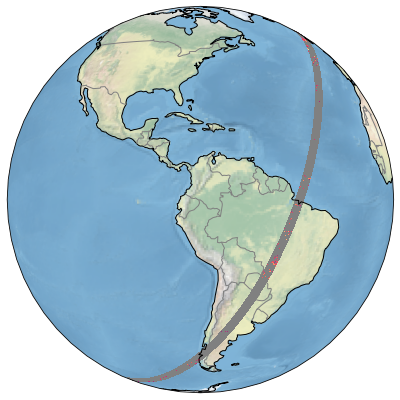

In [41]:
cmap = get_cmap("magma")
cmap.set_bad("grey")
norm = LogNorm(1e-3, 1e2)

gs = GridSpec(1, 2, width_ratios=[1.0, 0.05])
fig = plt.figure(figsize=(8, 8))
proj = ccrs.NearsidePerspective(central_latitude=0.0,
                                central_longitude=-75.0)
ax = plt.subplot(gs[0], projection=proj)
ax.stock_img()
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, color='gray')
sm = ax.pcolormesh(lons, lats, precip, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
                    
#ax = plt.subplot(gs[1])
#plt.colorbar(sm, cax=ax, fraction=0.4, pad=0.2, label="Surface precipitaiton [$mm\ h^{-1}$]")
plt.show()

In [68]:
t_0 = datetime(2017,12,30,18,54)
t_1 = datetime(2017,12,30,18,57)

In [108]:
files = goes_16_l1b_radiances_rgb_full_disk.download(t_0, t_1, '../dataset/temp/')

In [130]:
files

In [111]:
files = map(str, files)
scn = Scene(reader='abi_l1b', filenames=files)

#scn.load('true_color')
#scn = scn.resample(scn.min_area(), resampler='native')
#small_scn["true_color_small"] = small_scn["true_color"][:, ::8, ::8]

In [119]:
av = scn.available_dataset_names()

In [125]:
files = map(str, files)
scn = Scene(reader='abi_l1b', filenames=files)
scn.load(['true_color'])
small_scn = scn.resample(scn.min_area(), resampler='native')
small_scn["true_color_small"] = small_scn["true_color"][:, ::8, ::8]
small_scn.save_dataset('true_color_small', filename='full_disk_im_ex.png')

/home/ingrid/anaconda/envs/geostat/lib/python3.8/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()


In [129]:
small_scn.show('true_color_small')

/home/ingrid/anaconda/envs/geostat/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in cos
  return func(*(_execute_task(a, cache) for a in args))
/home/ingrid/anaconda/envs/geostat/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in log
  return func(*(_execute_task(a, cache) for a in args))
/home/ingrid/anaconda/envs/geostat/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in sin
  return func(*(_execute_task(a, cache) for a in args))
/home/ingrid/anaconda/envs/geostat/lib/python3.8/site-packages/satpy/resample.py:925: RuntimeWarning: Mean of empty slice
  data_mean = np.nanmean(data.reshape(new_shape), axis=(1, 3))
/home/ingrid/anaconda/envs/geostat/lib/python3.8/site-packages/satpy/composites/__init__.py:836: RuntimeWarning: Mean of empty slice
  data_mean = np.nanmean(av_data.reshape(new_shape), axis=(1, 3))
/home/ingrid/anaconda/envs/geostat/lib/python3.8/site-pack

KeyboardInterrupt: 